After Dc 2019 I looked backed into nClimGrid by NOAA, and I am happy that they now provide each data variable in a .nc file. Back than I had downloaded a lot of .tar.gz. (one for each month).

In [98]:
import os
import pandas as pd
import geopandas as gpd
import xarray as xr
import regionmask
import numpy as np

In [99]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (17,5)

In [100]:
ncd_file = r'/Users/babak.jfard/Downloads/nclimgrid_tavg.nc'
xd = xr.open_dataset(ncd_file)

In [101]:
xd

<xarray.Dataset>
Dimensions:  (lat: 596, lon: 1385, time: 1549)
Coordinates:
  * time     (time) datetime64[ns] 1895-01-01 1895-02-01 ... 2024-01-01
  * lat      (lat) float32 49.35 49.31 49.27 49.23 ... 24.69 24.65 24.6 24.56
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
Data variables:
    tavg     (time, lat, lon) float32 ...
Attributes: (12/14)
    date_created:              2024-01-05 11:04:55.312427
    date_modified:             2024-01-05 11:04:55.312582
    Conventions:               CF-1.6, ACDD-1.3
    ncei_template_version:     NCEI_NetCDF_Grid_Template_v2.0
    title:                     nClimGrid
    naming_authority:          gov.noaa.ncei
    ...                        ...
    geospatial_lat_min:        24.562532
    geospatial_lat_max:        49.3542
    geospatial_lon_min:        -124.6875
    geospatial_lon_max:        -67.020836
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east

In [102]:
# Now getting the map of Nabraska counties
NE_counties_filepath = r'/Users/babak.jfard/projects/drought_Vulnerability_NE/data/raw/Nebraska_COUNTY/NEBRASKA_COUNTY.shp'
NE_counties = gpd.read_file(NE_counties_filepath)

In [105]:
# Extracting the required lat/lon ranges for Nebraska
# Getthing the bounds from NE map
bounds = NE_counties.total_bounds
print(bounds)
lon_min = bounds[0]-0.05
lon_max = bounds[2]+0.05
lat_min = bounds[1]-0.05
lat_max = bounds[3]+0.05

# will add more than 5km on each side to cut
lon = np.arange (lon_min, lon_max)
lat = np.arange(lat_min, lat_max)

[-104.053514   39.999998  -95.30829    43.001708]


In [86]:
# reducing xd size to cover only Nebraska, therefore decreasing computational cost!
xd = xd.sel(time=slice('2010-01-01', '2022-12-31'), lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

In [88]:
NE_counties['FIPS'] = NE_counties['FIPS'].astype('int')

- Let's make sure that the mask is captured correctly, before expand it over all time periods.

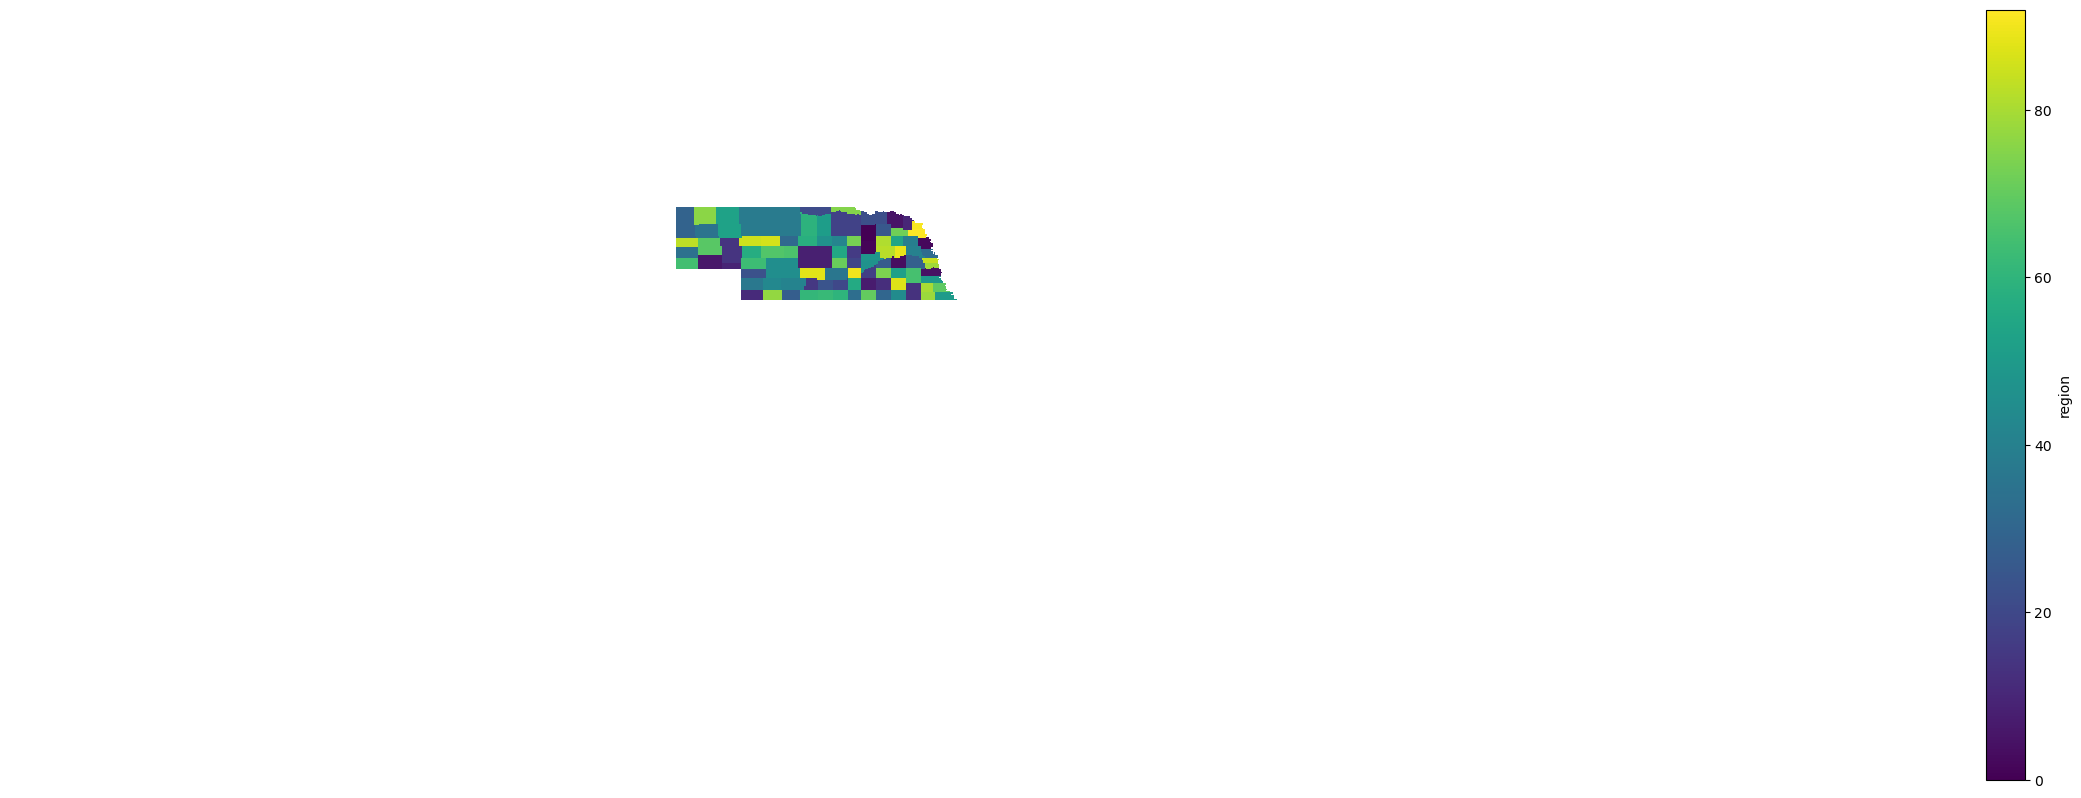

In [49]:
# To visually check
plt.figure(figsize=(30,10))
ax = plt.axes()
ax.axis('off')
mask.plot(ax=ax)
#NE_counties.plot(ax=ax, alpha=0.8, facecolor='none', lw=1)